D:\Anaconda\lib\site-packages\matplotlib\colorbar.py:427: UserWarning: set_ticks() must have been called.
  warnings.warn("set_ticks() must have been called.")


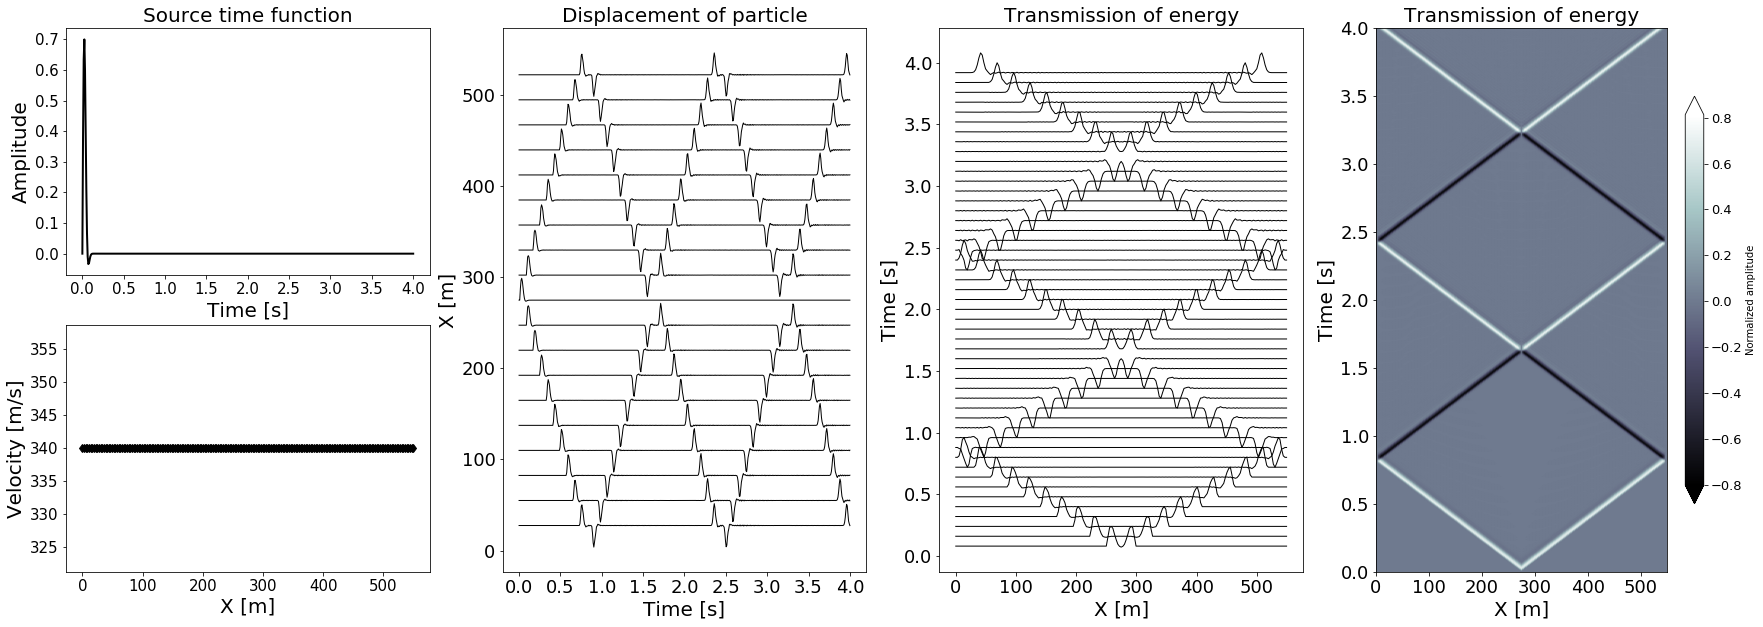

In [2]:
import numpy as np
import matplotlib.pyplot as plt

nt = 501
nx = 201
u = np.zeros((nt, nx))
t1 = 4.0
dt = t1 / (nt-1)
c = 340.
dx = c * dt * 1.01
x = np.arange(nx) * dx
t = np.linspace(0, t1, nt)

f = 8.0
g = 2.0
t0 = 0.1
A = (dt*c/dx) ** 2
# s = np.exp(-(2*np.pi*f*(t-t0)/g)**2) * np.cos(2*np.pi*f*(t-t0))
s = np.sin(2*np.pi*f*t) * np.exp(-2*np.pi*f*t**2*10)
for i in range(1, nt-1):
    for j in range(2, nx-2):
        u[:, 0: 2] = 0.
        u[:, -2: ] = 0.
        if j == 100:
            u[i+1][j] = s[i]
        else:
            u[i+1][j] = -u[i-1][j] + 2*u[i][j] + A * ( u[i][j+1]+u[i][j-1]-2*u[i][j] )
        
             
# plt.figure(figsize=(30, 10))
# plt.subplot(241)
# plt.plot(t, s, lw=2, color='k')
# plt.xlabel('Time [s]', fontsize=20)
# plt.ylabel('Amplitude', fontsize=20)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.title('Source time function', fontsize=20)

# plt.subplot(245)
# plt.plot(x, c*np.ones(len(x)), 'k:d', lw=2)
# plt.xlabel('X [m]', fontsize=20)
# plt.ylabel('Velocity [m/s]', fontsize=20)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)

# plt.subplot(142)
# for i in range(1, nx//10):
#     d = u[:, i*10]
#     d = d / max(abs(d)) * dt * 300
#     plt.plot(t, d*10 + i*10*dx, color='k', lw=1)
# plt.ylabel('X [m]', fontsize=20)
# plt.xlabel('Time [s]', fontsize=20)
# plt.xticks(fontsize=18)
# plt.yticks(fontsize=18)
# plt.title('Displacement of particle', fontsize=20)

# plt.subplot(143)
# for i in range(1, nt//10):
#     d = u[i*10, :]
#     d = d / max(abs(d)) * dt * 20
#     plt.plot(x, d + i*10*dt, color='k', lw=1)
# plt.xlabel('X [m]', fontsize=20)
# plt.ylabel('Time [s]', fontsize=20)
# plt.xticks(fontsize=18)
# plt.yticks(fontsize=18)
# plt.title('Transmission of energy', fontsize=20)

# plt.subplot(144)
# plt.pcolormesh(x, t, u, cmap='bone', shading='gouraud')
# plt.xlabel('X [m]', fontsize=20)
# plt.ylabel('Time [s]', fontsize=20)
# plt.xticks(fontsize=18)
# plt.yticks(fontsize=18)
# plt.title('Transmission of energy', fontsize=20)
# cbar = plt.colorbar(extend='both', shrink=0.75)
# cbar.set_ticklabels('Normalized amplitude')
# cbar.set_ticks(np.linspace(-1, 1, 11))
# cbar.ax.tick_params(labelsize=13)
# cbar.ax.set_ylabel('Normalized amplitude')
# # plt.savefig('1D_Acoustic_Wave_Modeling.pdf')
# plt.show()

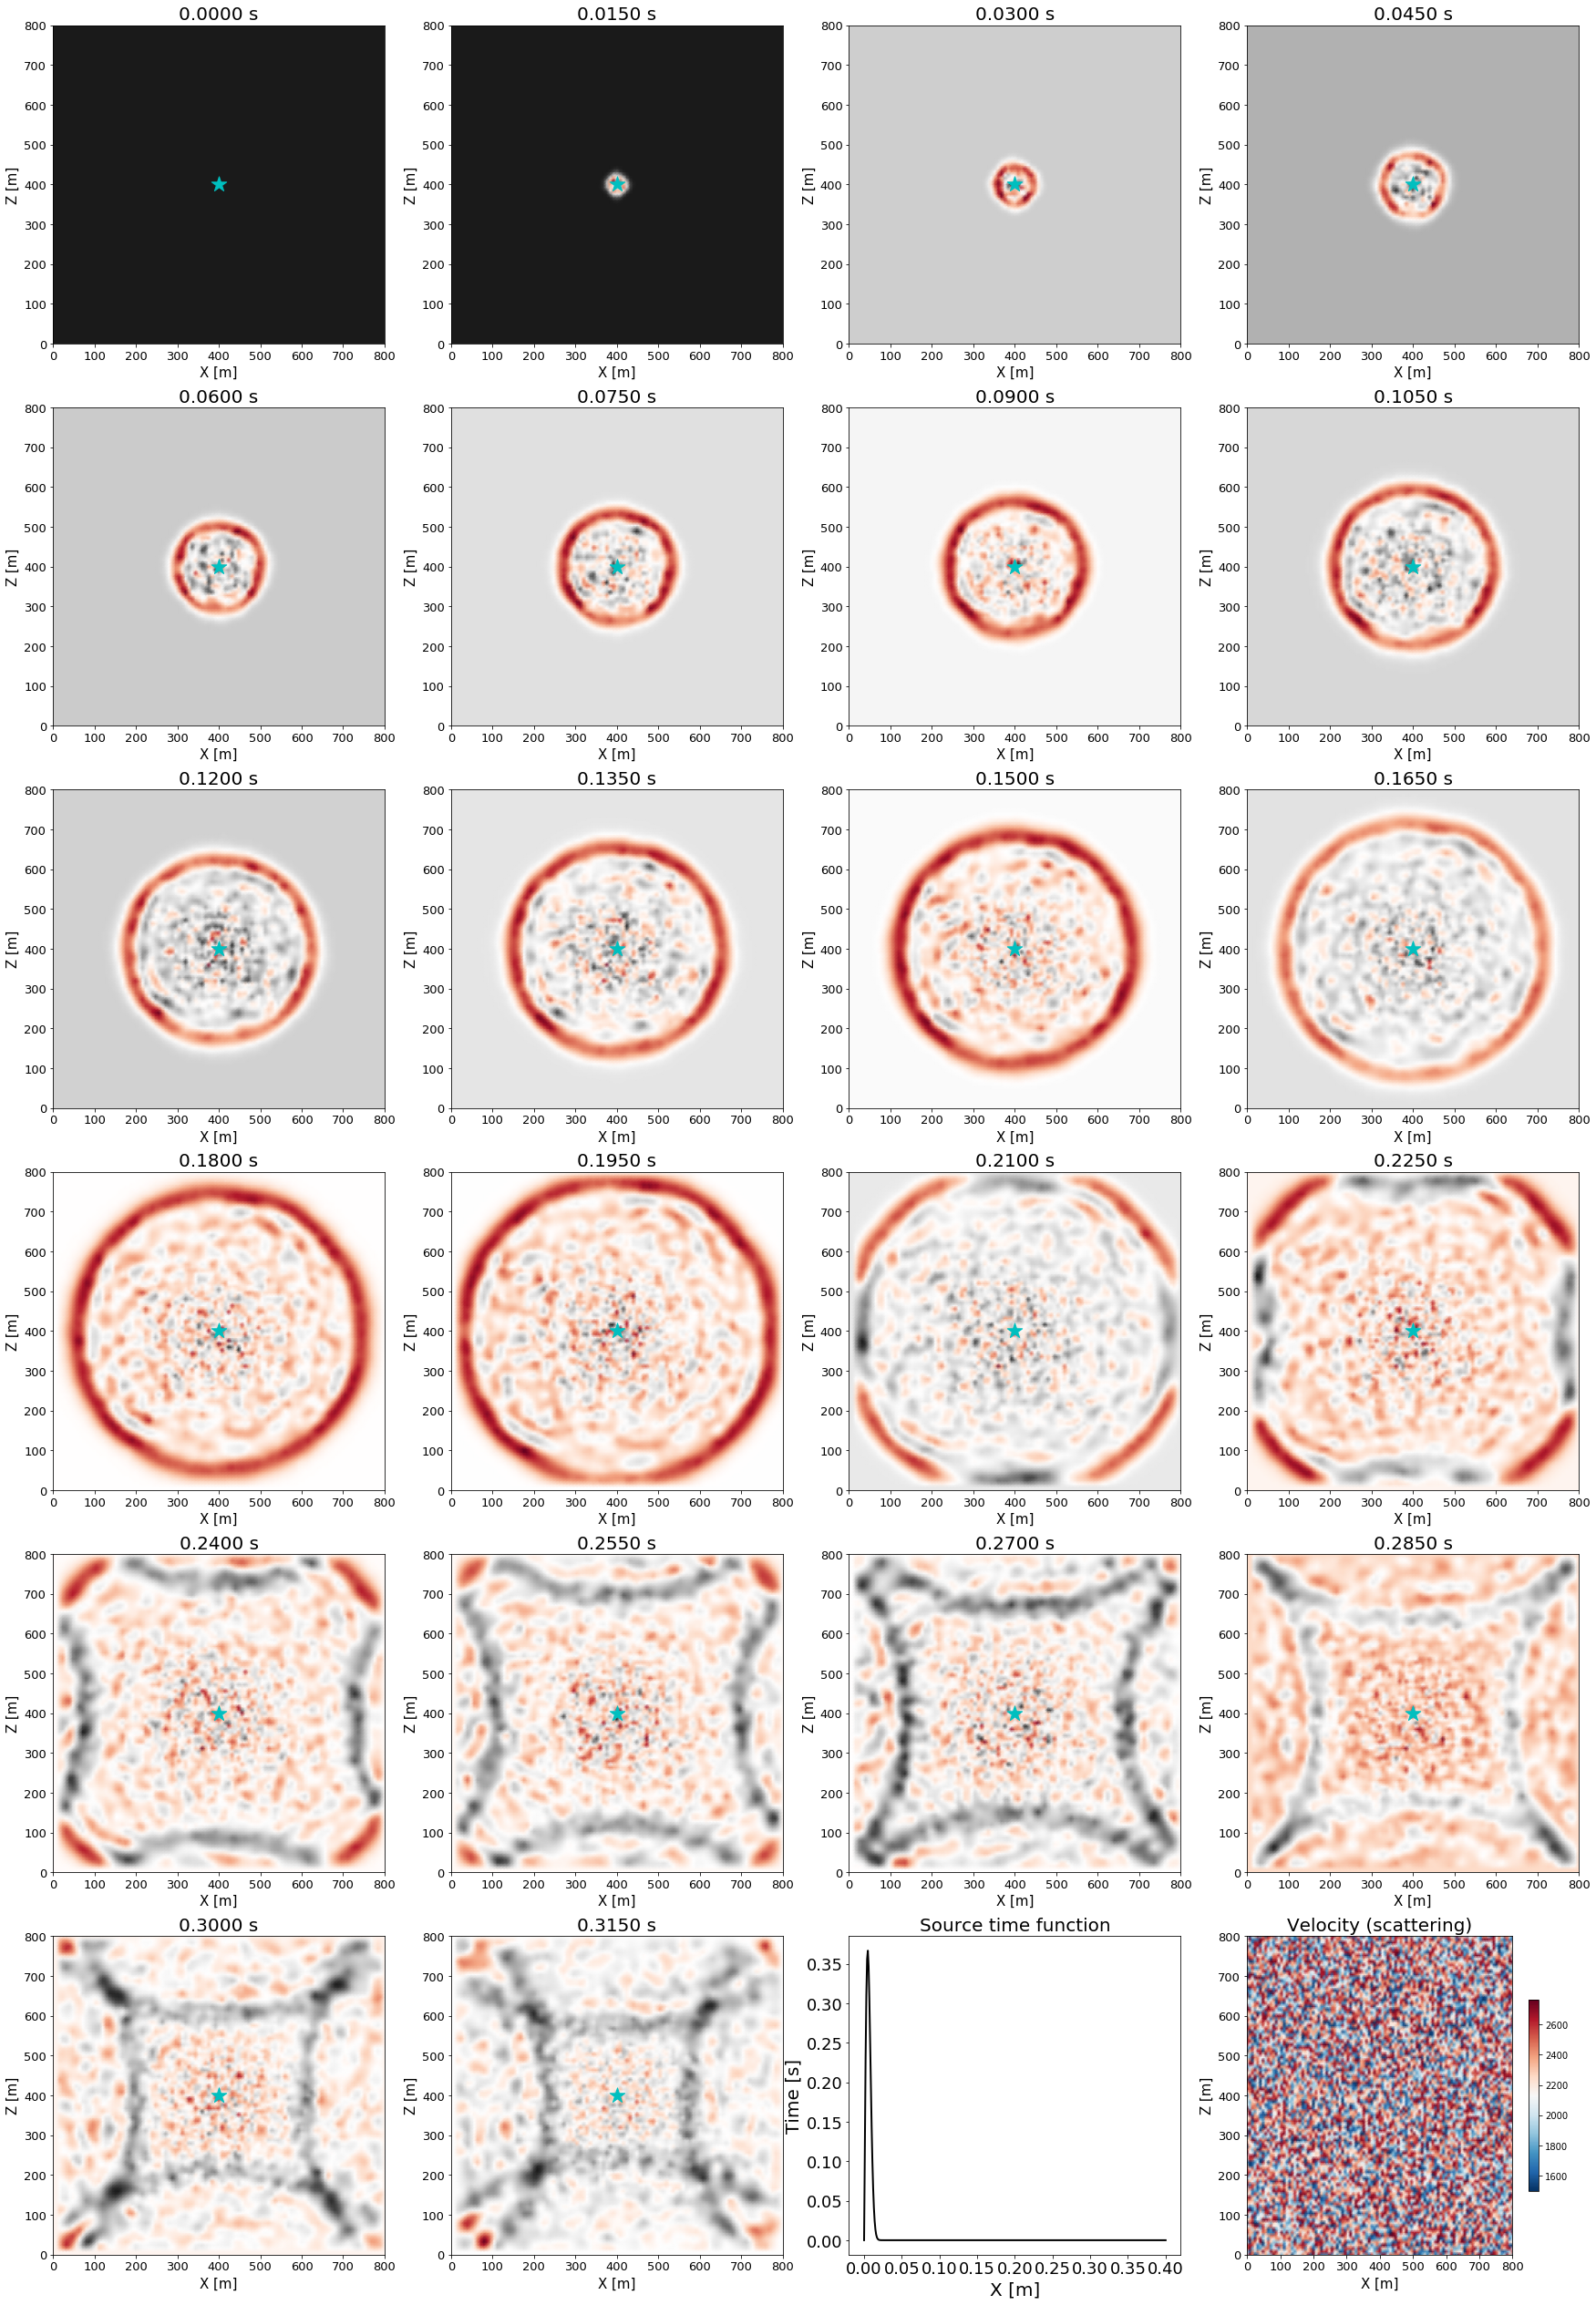

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

Nx = 101
Nz = 101
Nt = 401
dt = 0.001
c0 = 3000
c = c0/2 + c0/2 * abs(np.sin(np.random.random((Nz, Nx))))
h = 8
f = 20
gama = 3
x = np.arange(Nx) * h
z = np.arange(Nz) * h
A = (dt*c)**2 / h**2
u=np.zeros((Nx,Nz,Nt))
t = np.arange(Nt) * dt
# s = np.exp(-(2*np.pi*f*t/gama)**2) * np.cos(2*np.pi*f*t)
s = np.sin(2*np.pi*f*t) * np.exp(-2*np.pi*f*t**2*150)
for k in range(1, Nt-1):
    for i in range(2, Nx-1):
        for j in range(2, Nz-1):
            if i == Nx//2 and j == Nz//2:
                u[i, j, k+1] = s[k]
            else:
                u[i, j, k+1] = A[i, j] * (u[i+1, j, k]+u[i-1, j, k]+u[i, j+1, k]+u[i, j-1, k]-4*u[i, j, k])-u[i, j, k-1]+2*u[i, j, k]

plt.figure(figsize=(30, 45))
for i in range(22):
    index = i*15
    plt.subplot(6, 4, i+1)
    plt.pcolormesh(x, z, u[:, :, index], cmap='RdGy_r', shading='gouraud')
    plt.xlabel('X [m]', fontsize=15)
    plt.ylabel('Z [m]', fontsize=15)
    plt.scatter(Nx//2*h, Nz//2*h, marker='*', s=300, facecolor='c')
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.title('{:.4f}'.format(index*dt) + ' s', fontsize=20)

# Source time function.
plt.subplot(6, 4, 23)
plt.plot(t, s, lw=2, color='k')
plt.xlabel('X [m]', fontsize=20)
plt.ylabel('Time [s]', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Source time function', fontsize=20)
# plt.savefig('Wave_snapshot.pdf'

# Velocity map.
plt.subplot(6, 4, 24)
plt.pcolormesh(x, z, c, cmap='RdBu_r', shading='gouraud')
plt.xlabel('X [m]', fontsize=15)
plt.ylabel('Z [m]', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.colorbar(shrink=0.6)
plt.title('Velocity (scattering)', fontsize=20)
plt.show()

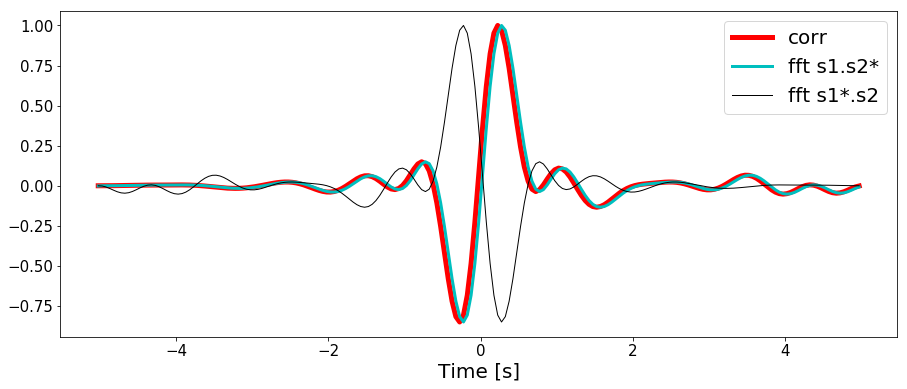

In [115]:
import numpy as np
import matplotlib.pyplot as plt

dt = 0.05
n1 = 101
n2 = 101
nn = 2 * (n2 if n2 > n1 else n1) - 1
t1 = np.arange(n1) * dt
t2 = np.arange(n2) *dt
s1 = np.sin(t1**2) * np.exp(-(t1-t1[n1//2])**2/10)
s2 = np.cos(t2**2) * np.exp(-(t2-t2[n2//2])**2/10)

tt1 = np.arange(nn) * dt - nn/2 * dt
cc1 = np.correlate(s1, s2, 'full')
cc1 = cc1 / max(abs(cc1))

fft_s1 = np.fft.fft(s1, nn)
fft_s2 = np.fft.fft(s2, nn)
cc2 = np.fft.ifftshift(np.fft.ifft(fft_s1*np.conjugate(fft_s2))).real
cc3 = np.fft.ifftshift(np.fft.ifft(fft_s2*np.conjugate(fft_s1))).real
cc2 = cc2 / max(abs(cc2))
cc3 = cc3 / max(abs(cc3))

plt.figure(figsize=(15, 6))
plt.plot(tt1, cc1, 'r', lw=5, label='corr')
plt.plot(tt1, cc2, 'c', lw=3, label='fft s1.s2*')
plt.plot(tt1, cc3, 'k', lw=1, label='fft s1*.s2')
plt.xlabel('Time [s]', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20)
plt.show()